Sampling techniques for improvement:

**SMOTE + Tomek Links**

SMOTE oversamples the minority class by generating synthetic samples.
Tomek Links removes ambiguous samples from the majority class near the decision boundary.

Advantages:
*   Improves class balance.
*   Enhances decision boundaries by reducing overlapping samples.

Original class distribution: Counter({0: 900, 1: 100})
Resampled class distribution: Counter({0: 900, 1: 900})


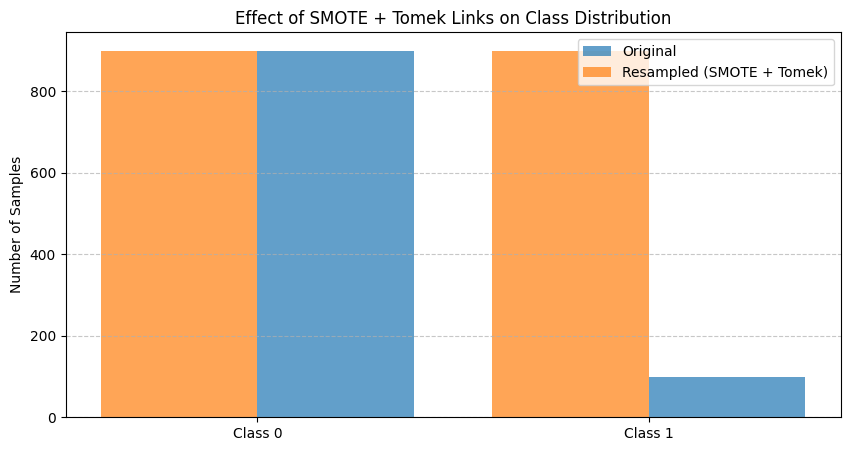

In [4]:
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek
from collections import Counter
import matplotlib.pyplot as plt

# Step 1: Generate an imbalanced dataset
X, y = make_classification(
    n_classes=2, class_sep=2, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=1000, random_state=42
)

# Step 2: Check original class distribution
original_distribution = Counter(y)
print("Original class distribution:", original_distribution)

# Step 3: Apply SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Step 4: Check new class distribution
resampled_distribution = Counter(y_resampled)
print("Resampled class distribution:", resampled_distribution)

# Step 5: Visualize the class distributions
plt.figure(figsize=(10, 5))
plt.bar(original_distribution.keys(), original_distribution.values(), alpha=0.7, label="Original", width=0.4, align='edge')
plt.bar(resampled_distribution.keys(), resampled_distribution.values(), alpha=0.7, label="Resampled (SMOTE + Tomek)", width=-0.4, align='edge')
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.ylabel("Number of Samples")
plt.title("Effect of SMOTE + Tomek Links on Class Distribution")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
